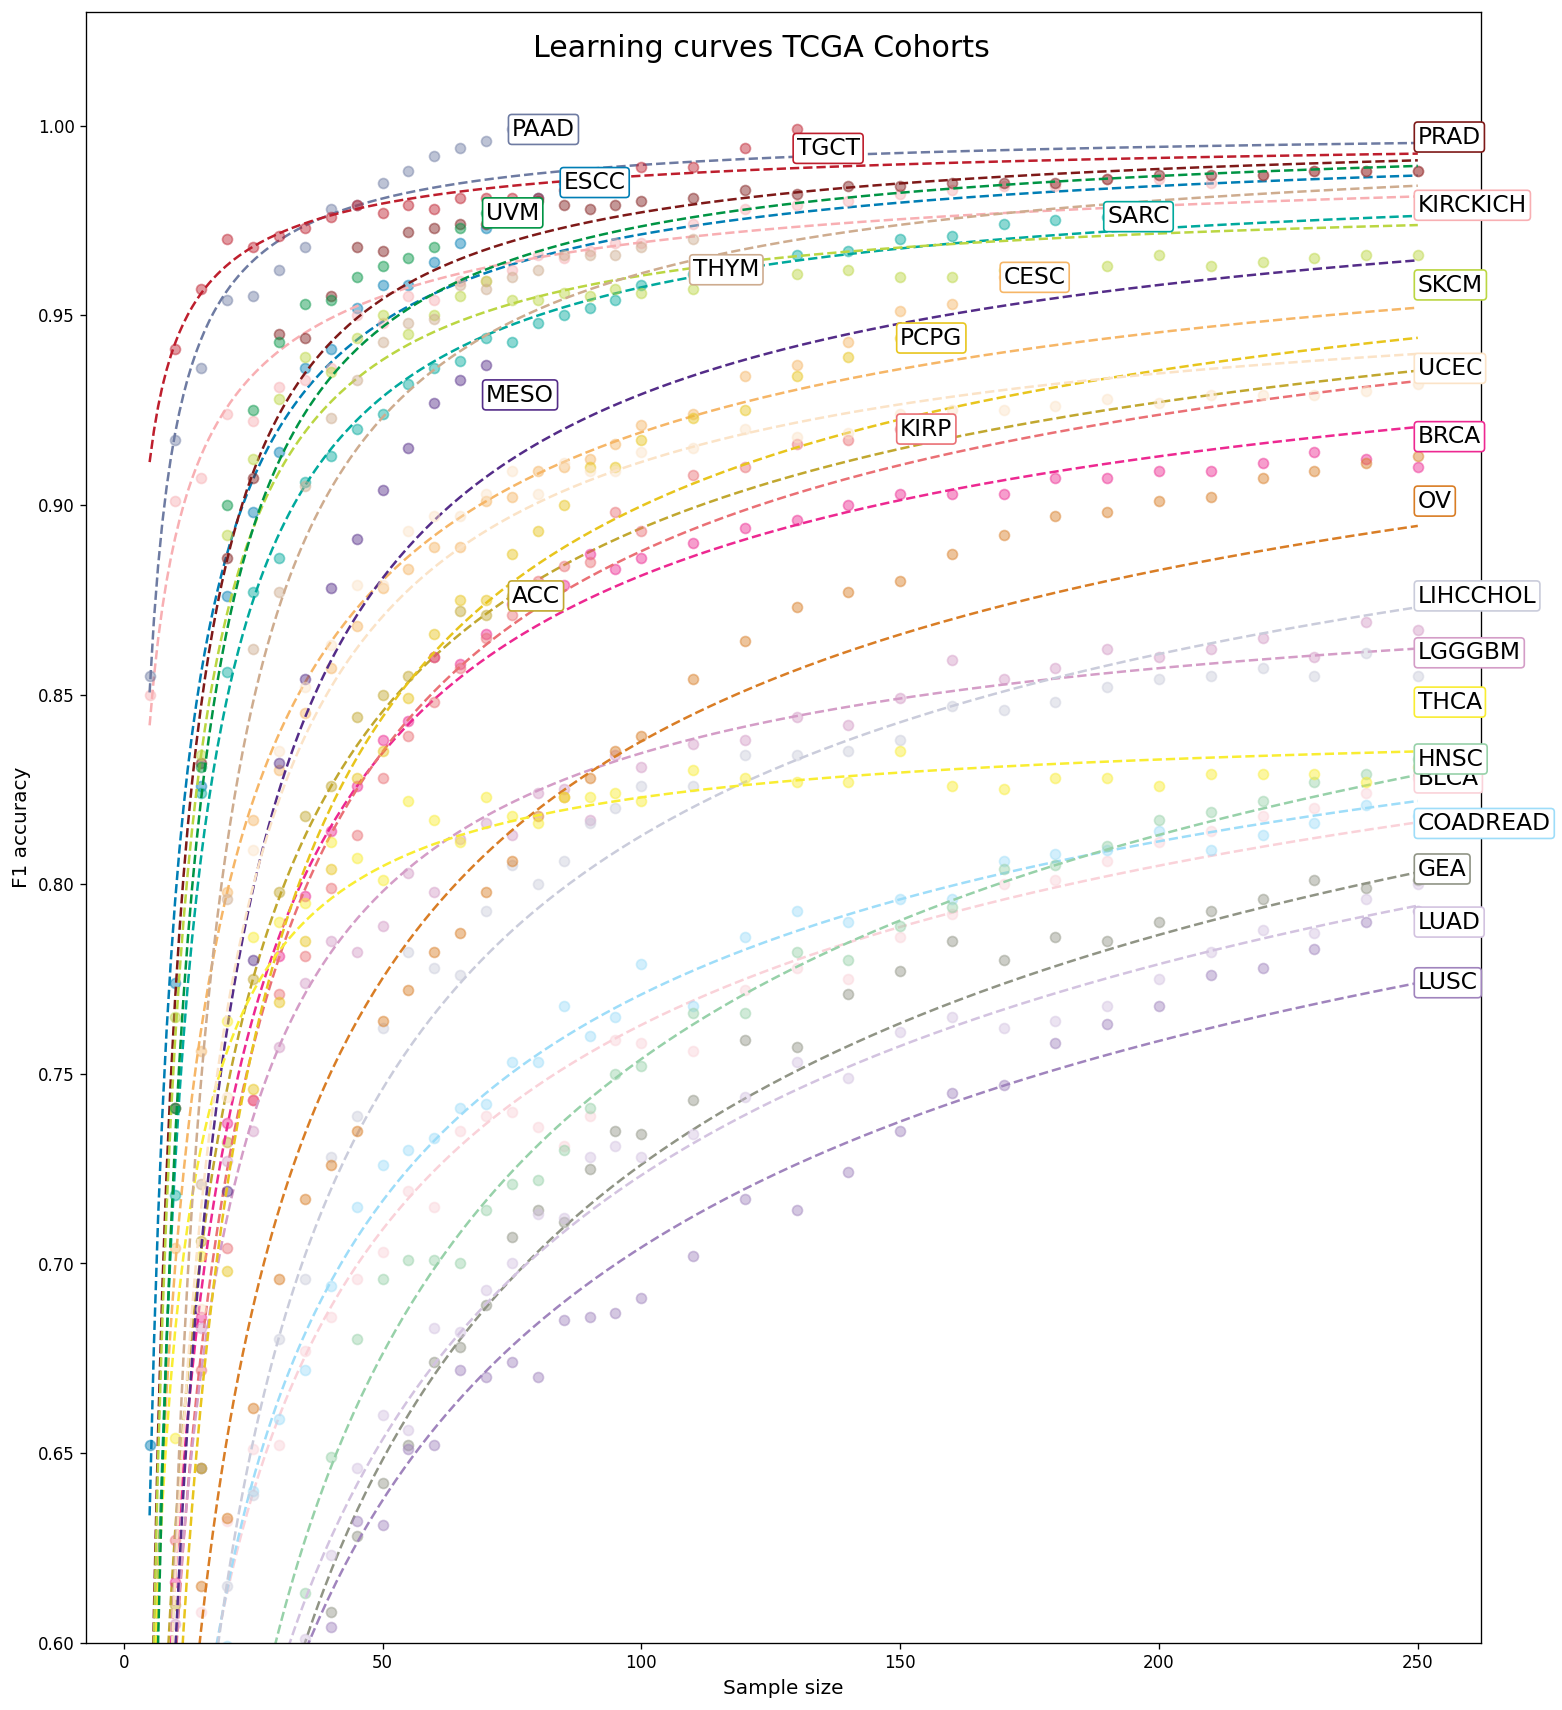

In [79]:
# Panel 7B Main plot
import pandas as pd
import json
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
colors = pd.read_csv('TCGA_colors_n26_20210228.csv', sep = ',', names = ['Cancer', 'Hexi'])
fig, ax = plt.subplots(figsize = (15,18), dpi = 120)

response_DF = pd.read_csv('sample_response_DF_20210805.tsv', sep = '\t')

def Y_acc(x, a, b, c): # x is sample size
    Y_acc = (1-a)-b*x**c
    return Y_acc

lower = [0,-1000,-1]
upper = [.5,1000,0]

offset = [0,    # ACC
          0,    # 
          .008,    # BRCA
          0,    # 
          -.002,    # COADREAD
          0,    # ESCC
          .003,    # GEA
          0,    # 
          -.009,    # KIRCKICH
          -.0,    # 
          -.006,      # LGGGBM
          .021,      # LIHCCHOL
          -.01,      # LUAD
          -.019,     # LUSC
          -.008,
          -.012, # OV
          0,
          0,
          .009, # PRAD
          0,
          -.008, # SKCM
          -.005, # TGCT
          .017,  # THCA
          -.008,
          .004, # UCEC
          0]

for idx, cohort in enumerate(response_DF.Cohort):
#     print(idx)
#     break
    accuracy_response_dct = {
        int(k):[i for i in v] for k,v in json.loads(
        response_DF.iloc[idx,1]).items()}
    
    accuracy_response = sorted(accuracy_response_dct.items())
    
    full_samples = []
    full_scores = []
    for i in list(range(0,len(accuracy_response))):
        score = mean(accuracy_response[i][1])
        mean_temp = round(score, 3)
        full_scores.append(mean_temp)
        full_samples.append(accuracy_response[i][0])
#     break
    f, _ = curve_fit(Y_acc, full_samples, full_scores, bounds=[lower,upper])
    color_shard = colors[colors.Cancer == cohort]
    colr = color_shard.iloc[0,1]
    ax.plot(full_samples, full_scores, 'o', c = colr, alpha = .45)
    ax.text(full_samples[-1], full_scores[-1]+offset[idx], cohort, fontsize = 14,va='center',
           bbox = dict(facecolor='white', edgecolor=colr, boxstyle='round,pad=0.15'))
    x = np.linspace(5, 250, 300)
    y = Y_acc(x, *f)  
    ax.plot(x, y, '--', color=colr)
fig.suptitle('Learning curves TCGA Cohorts', y = .87,fontsize = 18)
ax.set_xlabel('Sample size', fontsize = 12)
ax.set_ylabel('F1 accuracy', fontsize = 12)
plt.savefig('Main_plot.png',dpi=180)
plt.show()

In [41]:
for crt in response_DF.Cohort:
    print(crt)

ACC
BLCA
BRCA
CESC
COADREAD
ESCC
GEA
HNSC
KIRCKICH
KIRP
LGGGBM
LIHCCHOL
LUAD
LUSC
MESO
OV
PAAD
PCPG
PRAD
SARC
SKCM
TGCT
THCA
THYM
UCEC
UVM


In [ ]:
# Panel 7B Main plot, cropped
import pandas as pd
import json
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
colors = pd.read_csv('TCGA_colors_n26_20210228.csv', sep = ',', names = ['Cancer', 'Hexi'])
fig, ax = plt.subplots(figsize = (15,18), dpi = 120)

response_DF = pd.read_csv('sample_response_DF_20210805.tsv', sep = '\t')

def Y_acc(x, a, b, c): # x is sample size
    Y_acc = (1-a)-b*x**c
    return Y_acc

lower = [0,-1000,-1]
upper = [.5,1000,0]


# To do: reset offsets for cropped version
offset = [0,    # ACC
          0,    # 
          .008,    # BRCA
          0,    # 
          -.002,    # COADREAD
          0,    # ESCC
          .003,    # GEA
          0,    # 
          -.009,    # KIRCKICH
          -.0,    # 
          -.006,      # LGGGBM
          .021,      # LIHCCHOL
          -.01,      # LUAD
          -.019,     # LUSC
          -.008,
          -.012, # OV
          0,
          0,
          .009, # PRAD
          0,
          -.008, # SKCM
          -.005, # TGCT
          .017,  # THCA
          -.008,
          .004, # UCEC
          0]

for idx, cohort in enumerate(response_DF.Cohort):
#     print(idx)
#     break
    accuracy_response_dct = {
        int(k):[i for i in v] for k,v in json.loads(
        response_DF.iloc[idx,1]).items()}
    
    accuracy_response = sorted(accuracy_response_dct.items())
    
    full_samples = []
    full_scores = []
    for i in list(range(0,len(accuracy_response))):
        score = mean(accuracy_response[i][1])
        mean_temp = round(score, 3)
        full_scores.append(mean_temp)
        full_samples.append(accuracy_response[i][0])
#     break
    f, _ = curve_fit(Y_acc, full_samples, full_scores, bounds=[lower,upper])
    color_shard = colors[colors.Cancer == cohort]
    colr = color_shard.iloc[0,1]
    ax.plot(full_samples, full_scores, 'o', c = colr, alpha = .45)
    ax.text(full_samples[-1], full_scores[-1]+offset[idx], cohort, fontsize = 14,va='center',
           bbox = dict(facecolor='white', edgecolor=colr, boxstyle='round,pad=0.15'))
    x = np.linspace(5, 250, 300)
    y = Y_acc(x, *f)  
    ax.plot(x, y, '--', color=colr)
fig.suptitle('Learning curves TCGA Cohorts', y = .87,fontsize = 18)
ax.set_xlabel('Sample size', fontsize = 12)
ax.set_ylabel('F1 accuracy', fontsize = 12)
plt.ylim(.6,1.03)
plt.savefig('Main_plot_crop.png',dpi=180)
plt.show()

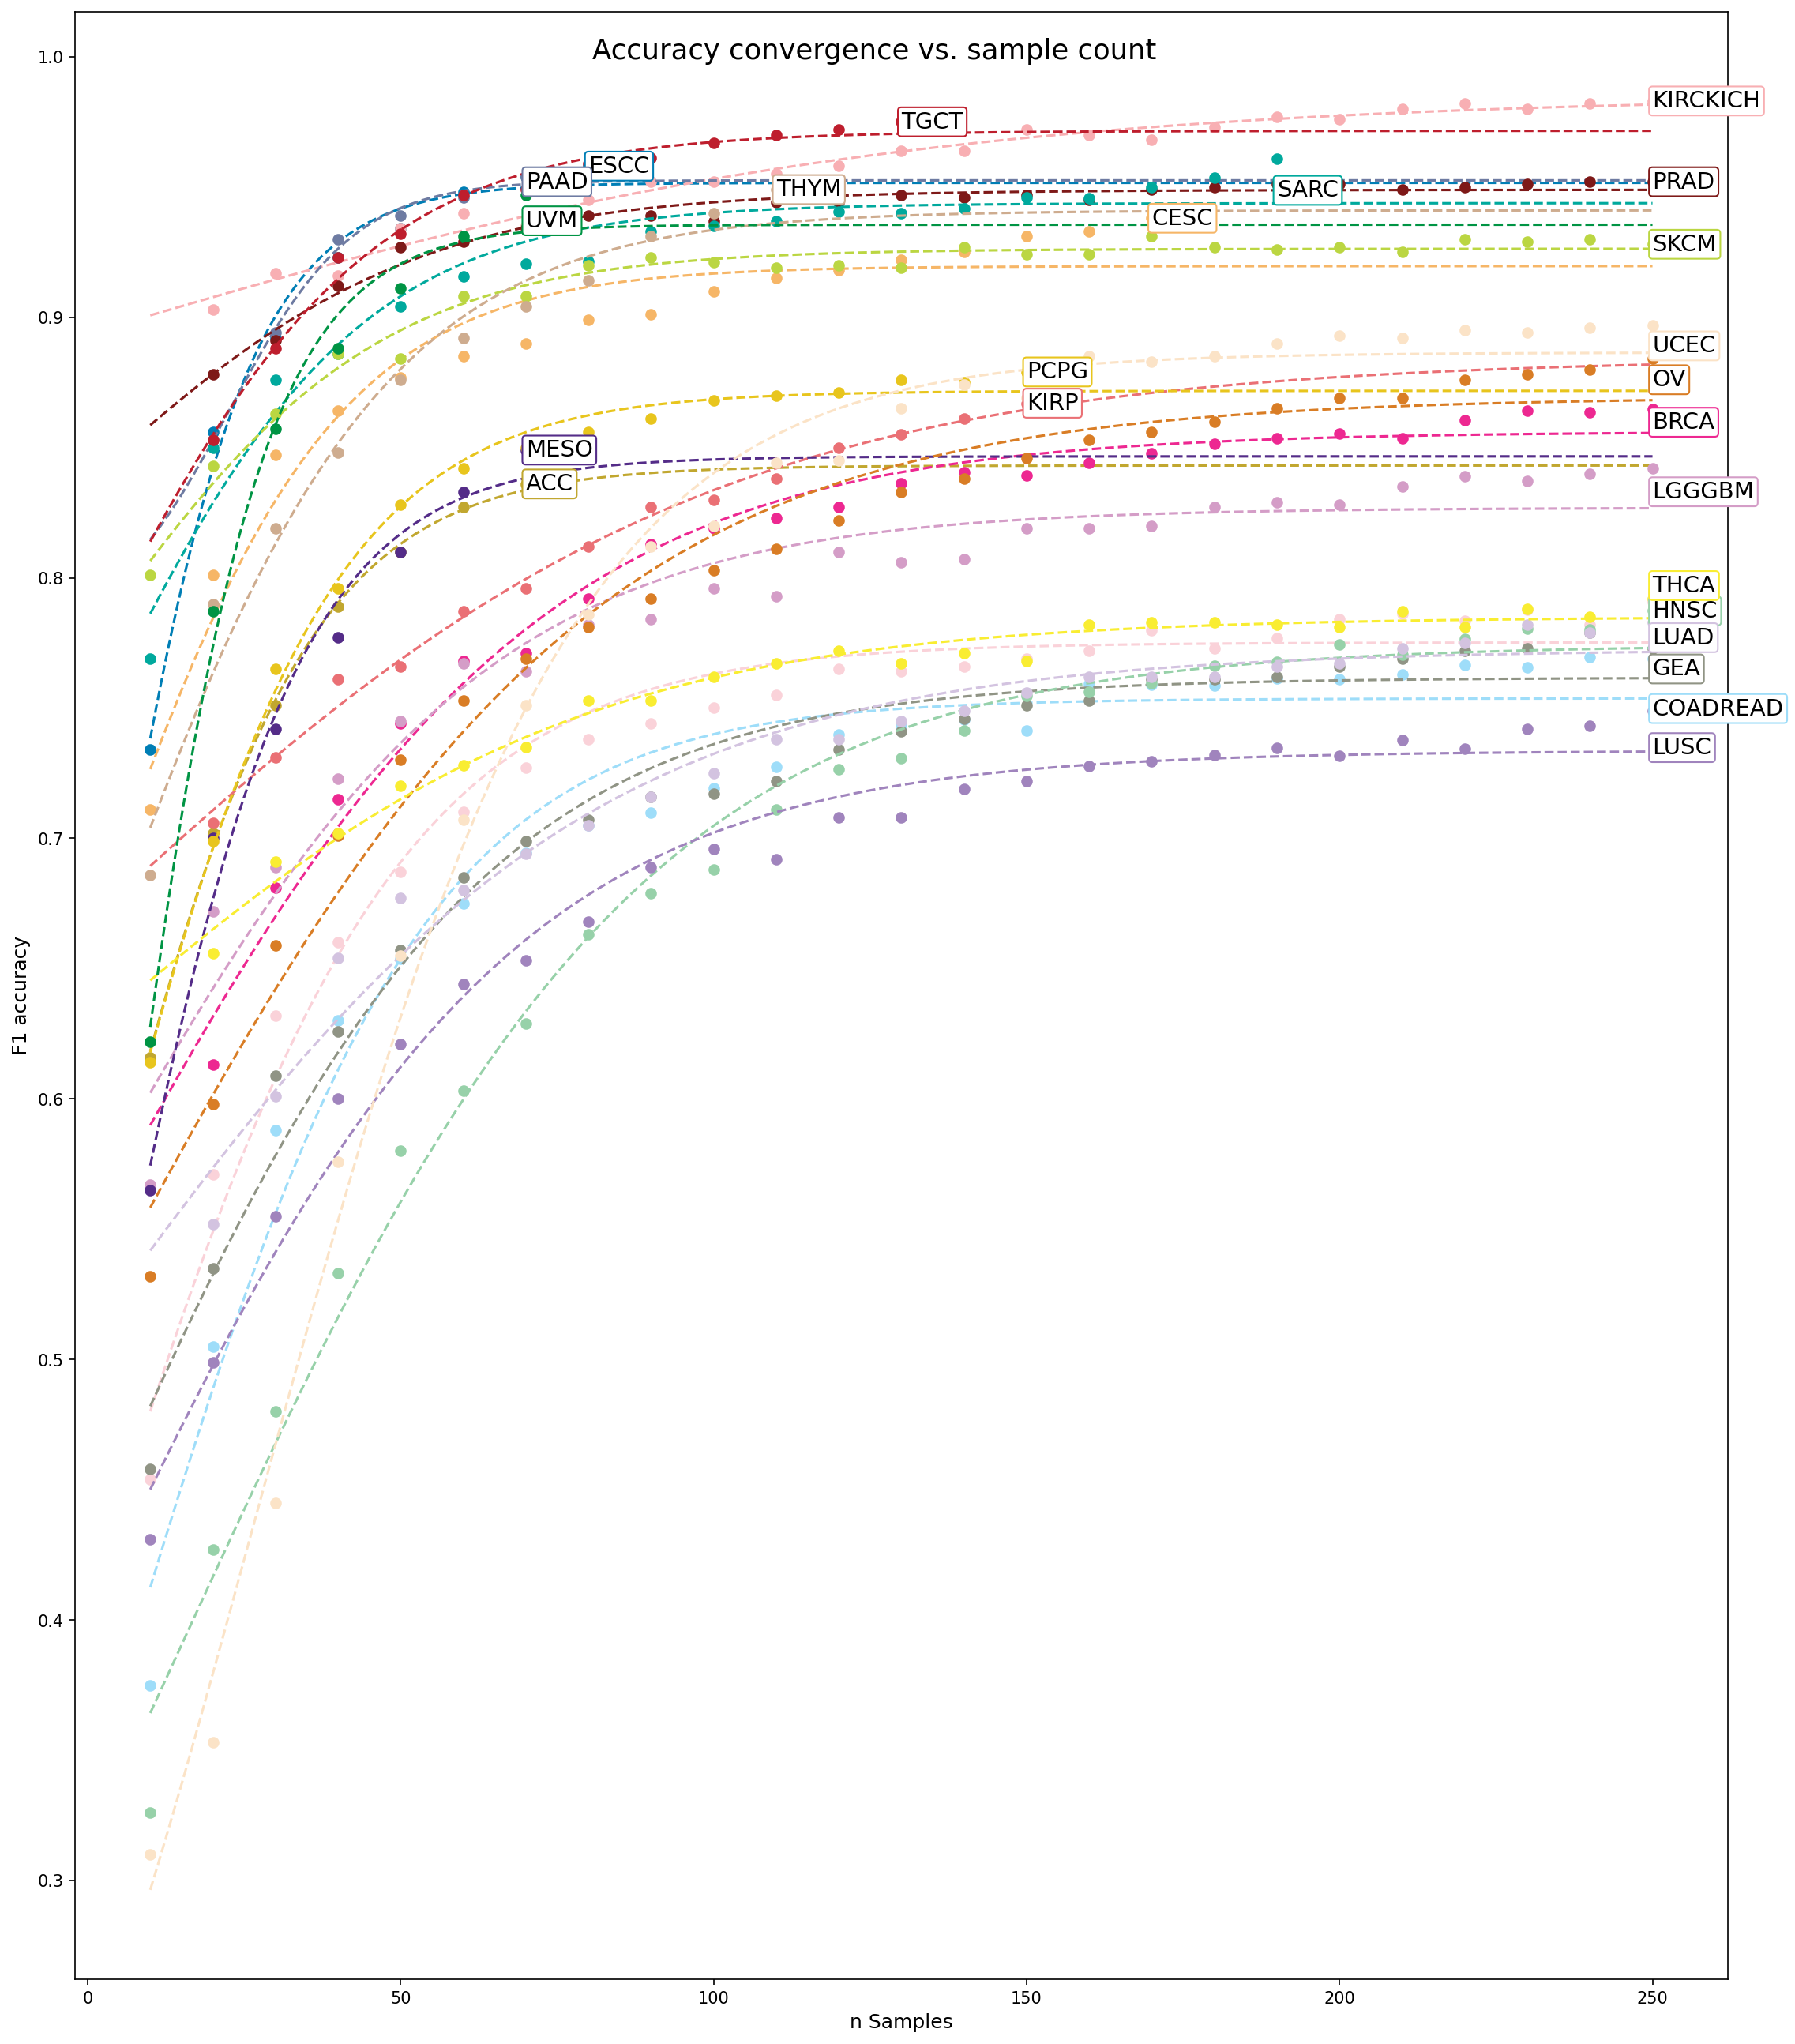

In [46]:
# Template for main plot
import pandas as pd
import json
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
colors = pd.read_csv('TCGA_colors_n26_20210228.csv', sep = ',', names = ['Cancer', 'Hexi'])
fig, ax = plt.subplots(figsize = (18,22), dpi = 150)

counts = {}
scores = {}
errors = {}
header = None
with open("Sample_count_response_summary_2.tsv") as handle:
    for tmp in handle:
        row = tmp.split("\t")
        if header is None:
            header = row
        else:
            n = row[0]
            c = json.loads(row[1])
            s = json.loads(row[2])
            e = json.loads(row[3])
            counts[n] = c
            scores[n] = s
            errors[n] = e

def sigmoid(x, a, b, c, d):
    y = 1 / (1 + np.exp(-((x/b)-a)))
    return y * c + d

lower = [0,0.1,0.1,0.0]
upper = [50,100,30,1.0]

offset = [0,0,-.005,0,-.019,
          0,-.008,0,0,0,
          -.009,-.006,-.014,0,-.008,
          -.002,0,0,-.012,0,
          0,.005,0,-.008,-.01]

for i,cohort in enumerate(counts):
    f, _ = curve_fit(sigmoid, counts[cohort], scores[cohort], bounds=[lower,upper])
    color_shard = colors[colors.Cancer == cohort]
    colr = color_shard.iloc[0,1]
    ax.plot(counts[cohort], scores[cohort], 'o', c = colr)
    ax.text(counts[cohort][-1], scores[cohort][-1]+offset[i], cohort, fontsize = 14,va='center',
           bbox = dict(facecolor='white', edgecolor=colr, boxstyle='round,pad=0.15'))
    x = np.linspace(10, 250, 1000)
    y = sigmoid(x, *f)  
    ax.plot(x, y, '--', color=colr)
fig.suptitle('Accuracy convergence vs. sample count', y = .87,fontsize = 17)
ax.set_xlabel('n Samples', fontsize = 12)
ax.set_ylabel('F1 accuracy', fontsize = 12)
plt.savefig('Main_plot.png',dpi=180)
plt.show()

In [1]:
# Begin plot on single 250 sample cohort, panel 7C
# Import packeages, read files, set bounds and inverse power function

import pandas as pd
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from scipy.optimize import curve_fit
import numpy as np # need for linspace in plot
from statistics import mean
import statistics
import time
import math
import json
from sklearn.linear_model import LinearRegression
import matplotlib.patches as mpatches
import matplotlib.lines as lines
from sklearn.linear_model import LinearRegression
pd.options.display.max_rows = 500

colors = pd.read_csv('TMP_cohort_colors_n26_20210228.csv',
                     sep = ',', skiprows = 1, names = ['Cohort', 'Hexi'])

sample_response_DF = pd.read_csv('sample_response_DF_20210805.tsv',
                                          sep = '\t')

lower = [0,-1000,-1]
upper = [.5,1000,0]

def Y_acc(x, a, b, c): # x is sample size
    Y_acc = (1-a)-b*x**c
    return Y_acc

# Continue from parameter bounds 0.1